# Introduction to Supervised Learning

In this notebook, we will explore some of the basic tools and concepts used in machine learning.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we will be using a synthetic dataset. In this case, we will exactly know the data generation process. The independent values ($X$) come from a uniform distribution between 0 and 1, and the dependent values ($y$) are equal to the sine of $2\pi X$ plus some noise which comes from a normal distribution with mean 0 and standard deviation 0.2.

**Disclaimer:** This is nothing like working with real data, but is just for learning purposes.

Of course, when working with real data, we won't know the underlying data generation process, and can only try to make good predictions based off of our limited sample.

In [37]:
def generate_noisy_sine(size = 50, sigma = 0.2, random_state = None):
    if random_state:
        np.random.seed(random_state)
    
    X = np.random.uniform(low = 0, high = 1, size = size)
    y = np.sin(2*np.pi*X) + np.random.normal(loc = 0, scale = sigma, size = size)
    
    X = X.reshape(-1,1)
    
    return X, y

In [38]:
X, y = generate_noisy_sine(size = 50, random_state = 321)

Let's take a look at our data with a scatterplot.

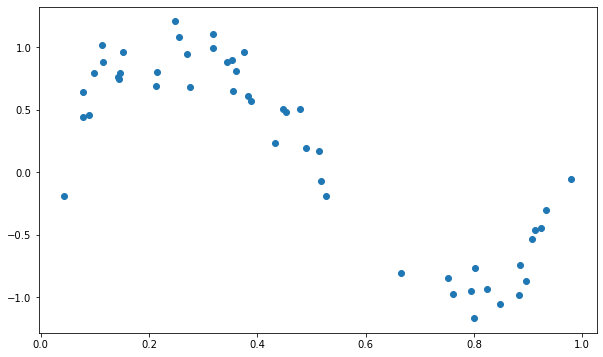

In [39]:
plt.figure(figsize = (10,6))
plt.scatter(X, y);

Let's add the sine function to our scatterplot.

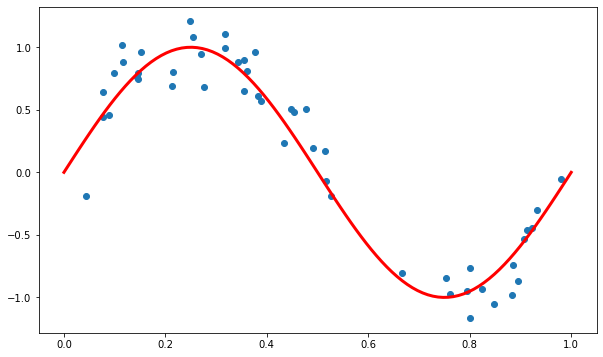

In [40]:
x_grid = np.linspace(start = 0, stop = 1, num = 100).reshape(-1,1)

plt.figure(figsize = (10,6))
plt.scatter(X, y)
plt.plot(x_grid, np.sin(2*np.pi*x_grid), color = 'red', linewidth = 3);

**What do you notice when you compare the observed data (the points) to the underlying generation function (the sine curve)?**

Even though it is not the correct model for the data generation process, let's see how well an ordinary linear model does at generating predictions.

That is, we'll generate predictions using a function of the form

$$\hat{f}(x) = \beta_0 + \beta_1 x$$

First, import the LinearRegression class from the linear_model module.

In [41]:
from sklearn.linear_model import LinearRegression

Then create an instance of this class

In [42]:
linreg = LinearRegression()

Finally, use the fit method, providing the predictor variable and target.

In [43]:
linreg.fit(X, y)

LinearRegression()

We can now generate predictions using the `predict` method. Let's take advantage of this in order to plot the fit line against the training data.

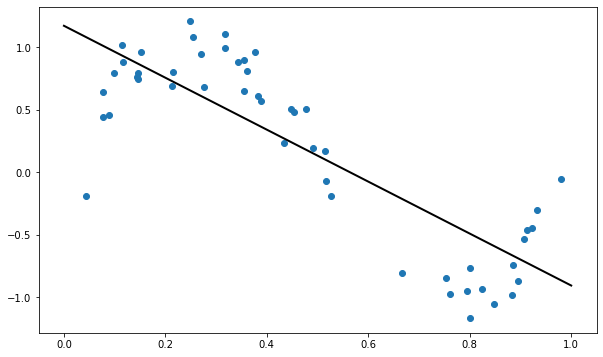

In [44]:
plt.figure(figsize = (10,6))
plt.scatter(X, y)
plt.plot(x_grid, linreg.predict(x_grid), color = 'black', linewidth = 2);

If we want to see the coefficients, we can access the `intercept_` and `coef_` attributes of our model.

In [46]:
linreg.intercept_

1.1716773622662195

In [47]:
linreg.coef_

array([-2.07665916])

This shows that our model looks like

$$\hat{f}(x) = 1.1717 - 2.0767x$$

How can we measure how well our model did? One common metric is the mean squared error.

$$\text{MSE} = \frac{1}{n}\sum_{i = 1}^n(\hat{f}(x_i) - y_i)^2$$

Where our dataset is $\{(x_1, y_1), \ldots, (x_n, y_n)\}$, and $\hat{f}(x_i)$ is the predicted value on $x_i$.

What we are doing is averaging the squared residuals, where the residual is the vertical distance between the true value and the predicted value.

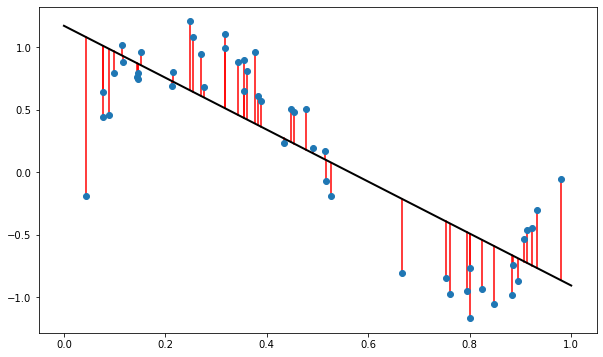

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(X, y)
plt.plot(x_grid, linreg.predict(x_grid), color = 'black', linewidth = 2)

for x_i,y_i,y_i_hat in zip(X, y, linreg.predict(X)):
    plt.plot([x_i,x_i], [y_i, y_i_hat], color = 'red', zorder = -100);

The mean squared error is available from scikit-learn's metrics module.

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
mean_squared_error(y, linreg.predict(X))

0.1639541342199965

What if we want to use a slightly more complicated model? Clearly a straight line is not going to do a great job, but maybe a degree 2 polynomial will.

In order to fit a polynomial, we can make use of the PolynomialFeatures class. Also, we can use a Pipeline to organize our work.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

To create a Pipeline, we need to specify a series of steps as a list of tuples. Each tuple should have a name for the step and then either a transformer or a model.

In [33]:
# Your code here

Once we have created our pipeline, we can fit it just like before.

In [15]:
pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linreg', LinearRegression())])

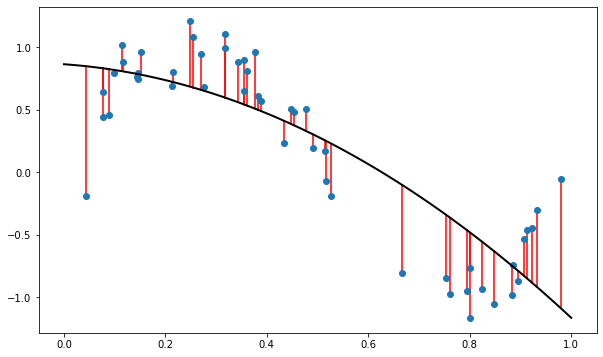

In [16]:
plt.figure(figsize = (10,6))
plt.scatter(X, y)
plt.plot(x_grid, pipe.predict(x_grid), color = 'black', linewidth = 2)

for x_i,y_i,y_i_hat in zip(X, y, pipe.predict(X)):
    plt.plot([x_i,x_i], [y_i, y_i_hat], color = 'red', zorder = -100);

In [17]:
mean_squared_error(y, pipe.predict(X))

0.1503129469861819

Maybe a degree 3 polynomial would do better.

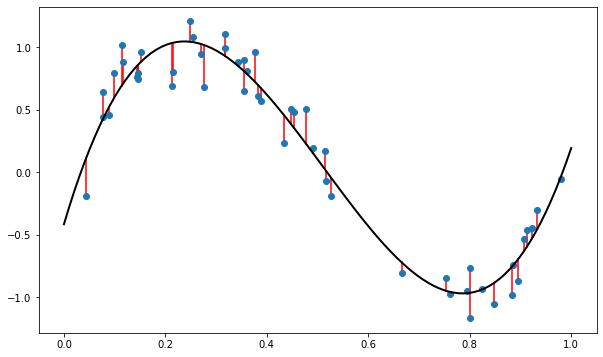

In [18]:
pipe = Pipeline(steps = [
    ('poly', PolynomialFeatures(degree = 3, include_bias = False)),
    ('linreg', LinearRegression())
])

pipe.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X, y)
plt.plot(x_grid, pipe.predict(x_grid), color = 'black', linewidth = 2)
for x_i,y_i,y_i_hat in zip(X, y, pipe.predict(X)):
    plt.plot([x_i,x_i], [y_i, y_i_hat], color = 'red', zorder = -100);

In [19]:
mean_squared_error(y, pipe.predict(X))

0.025723340160632303

We do see further improvement. Let's fit a whole range of different degrees and see how the MSEs compare.

In [20]:
MSE = {}

for degree in range(1, 11):

    pipe = Pipeline(steps = [
        ('poly', PolynomialFeatures(degree = degree, include_bias = False)),
        ('linreg', LinearRegression())
    ])

    pipe.fit(X, y)
    
    MSE[degree] = mean_squared_error(y, pipe.predict(X))

In [21]:
MSE

{1: 0.1639541342199965,
 2: 0.1503129469861819,
 3: 0.025723340160632303,
 4: 0.025417097095341176,
 5: 0.025083952627700183,
 6: 0.023673985830735482,
 7: 0.021677693848000154,
 8: 0.01925587010941142,
 9: 0.01913444302416382,
 10: 0.01811183393494318}

**What do you notice?**

But wait, if we're builing a model for prediction, we don't care how it does on the data that it has seen - what we care about is **generalization error**. How does it do on unseen data?

Since in this case, we have a function to generate new data, we can get a really accurate estimate of the generalization error by generating a really large sample, say 10000 points.

In [22]:
X_out, y_out = generate_noisy_sine(size = 10000)

Now, we can find the MSE for each degree we tested above.

In [23]:
MSE_out = {}

for degree in range(1, 11):

    pipe = Pipeline(steps = [
        ('poly', PolynomialFeatures(degree = degree, include_bias = False)),
        ('linreg', LinearRegression())
    ])

    pipe.fit(X, y)
    
    MSE_out[degree] = mean_squared_error(y_out, pipe.predict(X_out))

In [24]:
MSE_out

{1: 0.25870762133622965,
 2: 0.2766314545957484,
 3: 0.0498817425610914,
 4: 0.04976624783022037,
 5: 0.05645540136324497,
 6: 0.0644686284242545,
 7: 0.08990675529625282,
 8: 0.1565256816758808,
 9: 0.13230016649411971,
 10: 0.2351394408719202}

Let's compare the MSE that we observed on the training data to the MSE on unseen data (the generalization error).

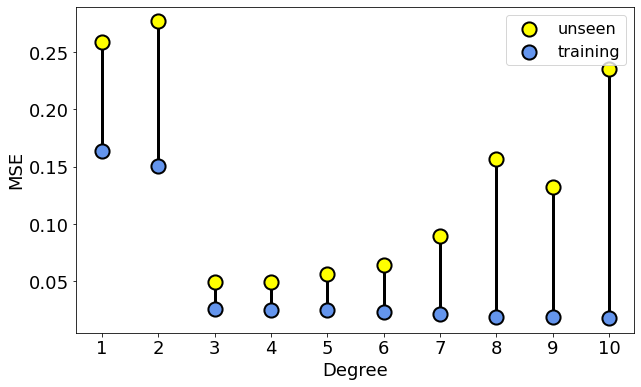

In [25]:
plt.figure(figsize = (10,6))

plt.scatter(range(1, 11), [MSE_out[i] for i in range(1, 11)], s = 200, 
            edgecolor = 'black', linewidth = 2, color = 'yellow', label = 'unseen')

plt.scatter(range(1, 11), [MSE[i] for i in range(1, 11)], s = 200, 
            edgecolor = 'black', linewidth = 2, color = 'cornflowerblue', label = 'training')


for i in range(1,11):
    plt.plot([i,i], [MSE[i], MSE_out[i]], color = 'black', linewidth = 3, zorder = -100)

fontsize = 18
plt.xlabel('Degree', fontsize = fontsize)
plt.ylabel('MSE', fontsize = fontsize)
plt.xticks(range(1, 11), fontsize = fontsize)
plt.yticks(fontsize = fontsize)

plt.legend(fontsize = fontsize - 2);

**Two things to note:**

1. The training MSE is overly optimistic (it is **biased downward**).

2. As we increase the degree of the polynomial (the complexity of the model), the training MSE improves, but the MSE on the unseen data drastically increases.

**What about with a real dataset where we can't call our data generation function to get data?**

We can approximate it!

One way to approximate is to save some of our data as a test set. We will fit the model only on the remaining training data. Then we can approximate the unseen error using the test set.

To create this test set, we can use the train_test_split function from the model_selection module.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Your code here  - use random_state = 1

In [28]:
MSE_train = {}
MSE_test = {}
MSE_out = {}

for degree in range(1, 11):

    pipe = Pipeline(steps = [
        ('poly', PolynomialFeatures(degree = degree, include_bias = False)),
        ('linreg', LinearRegression())
    ])

    pipe.fit(X_train, y_train)
    
    MSE_train[degree] = mean_squared_error(y_train, pipe.predict(X_train))
    
    MSE_test[degree] = mean_squared_error(y_test, pipe.predict(X_test))
    
    MSE_out[degree] = mean_squared_error(y_out, pipe.predict(X_out))

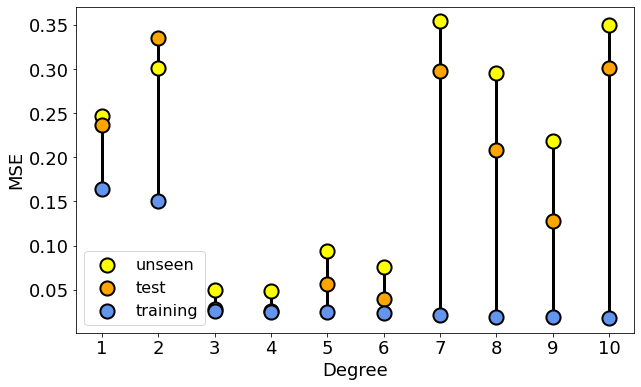

In [29]:
plt.figure(figsize = (10,6))

plt.scatter(range(1, 11), [MSE_out[i] for i in range(1, 11)], s = 200, 
            edgecolor = 'black', linewidth = 2, color = 'yellow', label = 'unseen')

plt.scatter(range(1, 11), [MSE_test[i] for i in range(1, 11)], s = 200, 
            edgecolor = 'black', linewidth = 2, color = 'orange', label = 'test')

plt.scatter(range(1, 11), [MSE[i] for i in range(1, 11)], s = 200, 
            edgecolor = 'black', linewidth = 2, color = 'cornflowerblue', label = 'training')


for i in range(1,11):
    plt.plot([i,i], [MSE[i], max(MSE_out[i], MSE_test[i])], color = 'black', linewidth = 3, zorder = -100)

fontsize = 18
plt.xlabel('Degree', fontsize = fontsize)
plt.ylabel('MSE', fontsize = fontsize)
plt.xticks(range(1, 11), fontsize = fontsize)
plt.yticks(fontsize = fontsize)

plt.legend(fontsize = fontsize - 2);

**What do you notice?**

**Takeaways:** Using a test set can give us an (unbiased) estimate of the error on an unseen set.

When I say that the test data is an unbiased estimate of the generalization error, that means that on average it will be correct, but on any given model, it is unlikely to be correct.

Let's do a simulation to show that we do in fact get an unbiased estimate from the test data.

In [30]:
MSE_test_vs_out = []

np.random.seed(321)

for _ in range(1000):
    X, y = generate_noisy_sine(size = 50)
    X_out, y_out = generate_noisy_sine(size = 10000)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
    
    pipe = Pipeline(steps = [
        ('poly', PolynomialFeatures(degree = 3, include_bias = False)),
        ('linreg', LinearRegression())
    ])

    pipe.fit(X_train, y_train)
    
    MSE_test = mean_squared_error(y_test, pipe.predict(X_test))
    
    MSE_out = mean_squared_error(y_out, pipe.predict(X_out))
        
    MSE_test_vs_out.append(MSE_test - MSE_out)

On average, the test error will be equal to the true error. That is, the error on the test set is an **unbiased** estimate of the true error.

In [31]:
np.mean(MSE_test_vs_out)

-0.0008395482743570748

However, there is some variance since the test set is only a small sample.

In [32]:
np.std(MSE_test_vs_out)

0.021229343111372197

**Why?** Think about it like estimating the mean of a population from a sample. The standard error is inversely proportional to the root of the sample size.